In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [23]:
DF = pd.read_csv('ChurnDataset.csv')

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
DF = pd.read_csv('ChurnDataset.csv')
DF["Voice mail plan"]=le.fit_transform(DF["Voice mail plan"])
DF["International plan"]=le.fit_transform(DF["International plan"])
DF['Churn'] = le.fit_transform(DF['Churn'])
print(DF)
DF["Total Charge"] = DF["Total day charge"] + DF["Total eve charge"] + DF["Total night charge"] + DF["Total intl charge"]
DF.head()
DF["Total Call Mins"] = DF["Total day minutes"] + DF["Total eve minutes"] + DF["Total night charge"] + DF["Total intl minutes"]
DF.head()

     State  Account length  Area code  International plan  Voice mail plan  \
0       KS             128        415                   0                1   
1       OH             107        415                   0                1   
2       NJ             137        415                   0                0   
3       OH              84        408                   1                0   
4       OK              75        415                   1                0   
...    ...             ...        ...                 ...              ...   
3328    WI             114        415                   0                1   
3329    AL             106        408                   0                1   
3330    VT              60        415                   0                0   
3331    WV             159        415                   0                0   
3332    CT             184        510                   1                0   

      Number vmail messages  Total day minutes  Total day calls

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Charge,Total Call Mins
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,75.56,483.51
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,59.24,382.25
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,62.29,384.12
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,66.80,376.76
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,52.09,333.51


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
DF = np.array(ct.fit_transform(DF))
print(DF)

[[  1.     0.     1.   ...   0.    75.56 483.51]
 [  1.     0.     1.   ...   0.    59.24 382.25]
 [  1.     0.     1.   ...   0.    62.29 384.12]
 ...
 [  1.     0.     1.   ...   0.    53.2  301.55]
 [  1.     0.     1.   ...   0.    57.52 387.82]
 [  1.     0.     1.   ...   0.    57.53 384.66]]


In [46]:
##generate data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

####EDIT THE INDIV COLUMNS HERE####
minu = pd.DataFrame(DF['Total intl minutes'])  ##minutes
call= pd.DataFrame(DF['Total intl calls'])     ##calls
charge= pd.DataFrame(DF['Total intl charge'])   ##charge
Churn= pd.DataFrame(DF['Churn']) 
####EDIT THE INDIV COLUMNS HERE####

m_train, m_test, churn_train1, churn_test1 = train_test_split(minu, Churn, test_size = 0.20)
cl_train, cl_test, churn_train2, churn_test2 = train_test_split(call, Churn, test_size = 0.20)
ch_train, ch_test, churn_train3, churn_test3 = train_test_split(charge, Churn, test_size = 0.20)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8555888972243061

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8530734632683659



[Text(508.1785714285714, 978.48, 'Total intl minutes <= 13.15\ngini = 0.247\nsamples = 2666\nvalue = [2281, 385]\nclass = false'),
 Text(219.2142857142857, 761.0400000000001, 'Total intl minutes <= 3.85\ngini = 0.224\nsamples = 2289\nvalue = [1995, 294]\nclass = false'),
 Text(119.57142857142856, 543.6, 'Total intl minutes <= 2.05\ngini = 0.046\nsamples = 42\nvalue = [41, 1]\nclass = false'),
 Text(79.71428571428571, 326.1600000000001, 'Total intl minutes <= 1.55\ngini = 0.1\nsamples = 19\nvalue = [18, 1]\nclass = false'),
 Text(39.857142857142854, 108.72000000000003, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = false'),
 Text(119.57142857142856, 108.72000000000003, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = false'),
 Text(159.42857142857142, 326.1600000000001, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = false'),
 Text(318.85714285714283, 543.6, 'Total intl minutes <= 12.45\ngini = 0.227\nsamples = 2247\nvalue = [1954, 293]\nclass = false'),
 Text(239.142857142857

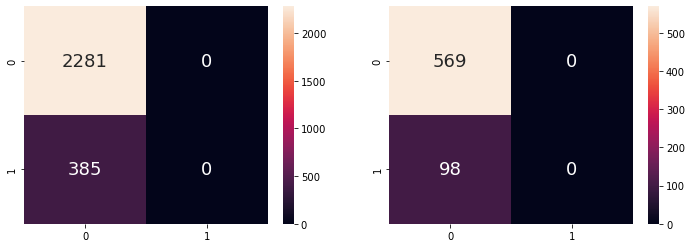

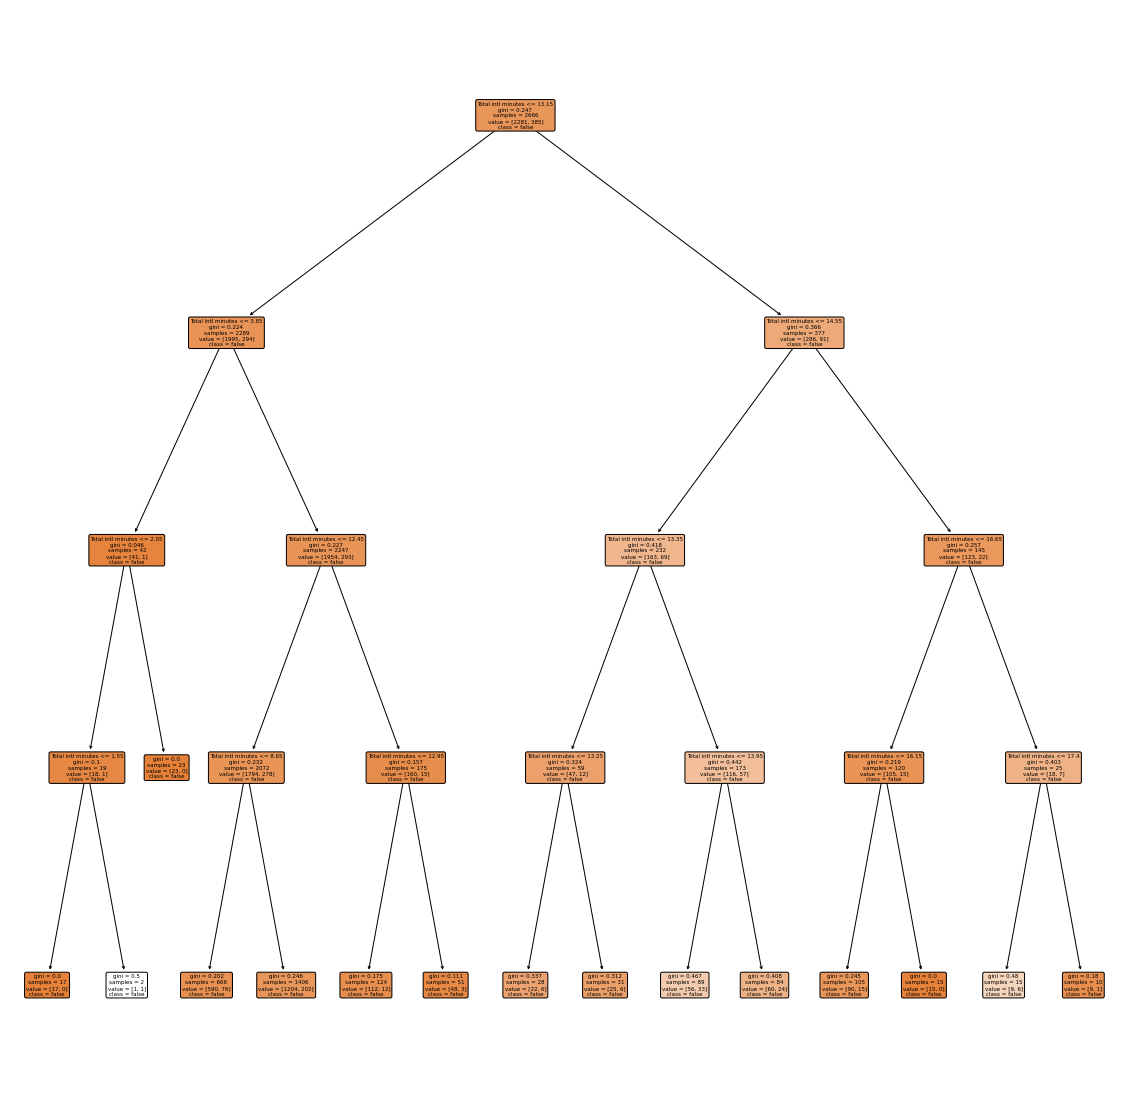

In [76]:
from sklearn.tree import plot_tree

dectree1 = DecisionTreeClassifier(max_depth = 4)  
dectree1.fit(m_train, churn_train1)                    


churn_train_pred1 = dectree1.predict(m_train)
churn_test_pred1 = dectree1.predict(m_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(m_train, churn_train1))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(m_test, churn_test1))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(churn_train1, churn_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(churn_test1, churn_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


f = plt.figure(figsize=(20,20))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=m_train.columns, 
          class_names=["false","true"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8533383345836459

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.863568215892054



[Text(620.0, 978.48, 'Total intl calls <= 2.5\ngini = 0.251\nsamples = 2666\nvalue = [2274, 392]\nclass = false'),
 Text(372.0, 761.0400000000001, 'Total intl calls <= 1.5\ngini = 0.338\nsamples = 530\nvalue = [416, 114]\nclass = false'),
 Text(248.0, 543.6, 'Total intl calls <= 0.5\ngini = 0.254\nsamples = 141\nvalue = [120, 21]\nclass = false'),
 Text(124.0, 326.1600000000001, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = false'),
 Text(372.0, 326.1600000000001, 'gini = 0.28\nsamples = 125\nvalue = [104, 21]\nclass = false'),
 Text(496.0, 543.6, 'gini = 0.364\nsamples = 389\nvalue = [296, 93]\nclass = false'),
 Text(868.0, 761.0400000000001, 'Total intl calls <= 19.5\ngini = 0.226\nsamples = 2136\nvalue = [1858, 278]\nclass = false'),
 Text(744.0, 543.6, 'Total intl calls <= 3.5\ngini = 0.226\nsamples = 2135\nvalue = [1858, 277]\nclass = false'),
 Text(620.0, 326.1600000000001, 'gini = 0.26\nsamples = 520\nvalue = [440, 80]\nclass = false'),
 Text(868.0, 326.1600000000001, 'Tot

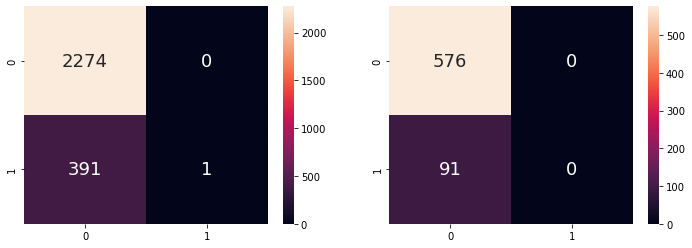

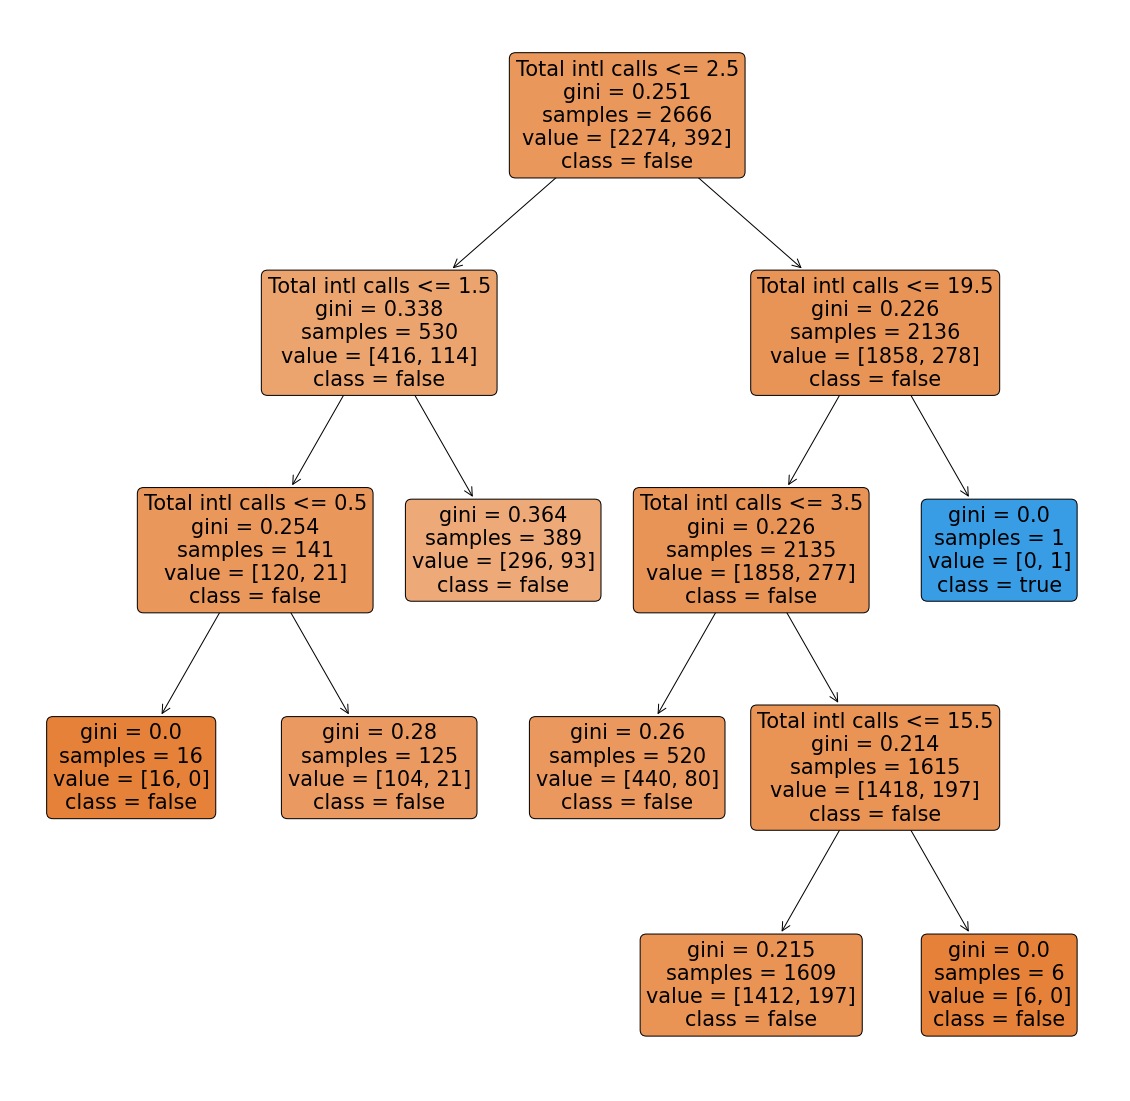

In [77]:
from sklearn.tree import plot_tree

dectree2 = DecisionTreeClassifier(max_depth = 4)  
dectree2.fit(cl_train, churn_train2)                    

churn_train_pred2 = dectree2.predict(cl_train)
churn_test_pred2 = dectree2.predict(cl_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(cl_train, churn_train2))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(cl_test, churn_test2))
print()

f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(churn_train2, churn_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(churn_test2, churn_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


f = plt.figure(figsize=(20,20))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=cl_train.columns, 
          class_names=["false","true"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8619654913728432

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8350824587706147



[Text(508.1785714285714, 978.48, 'Total intl charge <= 3.55\ngini = 0.241\nsamples = 2666\nvalue = [2293, 373]\nclass = false'),
 Text(219.2142857142857, 761.0400000000001, 'Total intl charge <= 1.04\ngini = 0.22\nsamples = 2298\nvalue = [2009, 289]\nclass = false'),
 Text(119.57142857142856, 543.6, 'Total intl charge <= 0.555\ngini = 0.045\nsamples = 43\nvalue = [42, 1]\nclass = false'),
 Text(79.71428571428571, 326.1600000000001, 'Total intl charge <= 0.42\ngini = 0.1\nsamples = 19\nvalue = [18, 1]\nclass = false'),
 Text(39.857142857142854, 108.72000000000003, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = false'),
 Text(119.57142857142856, 108.72000000000003, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = false'),
 Text(159.42857142857142, 326.1600000000001, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]\nclass = false'),
 Text(318.85714285714283, 543.6, 'Total intl charge <= 1.12\ngini = 0.223\nsamples = 2255\nvalue = [1967, 288]\nclass = false'),
 Text(239.1428571428571, 326.

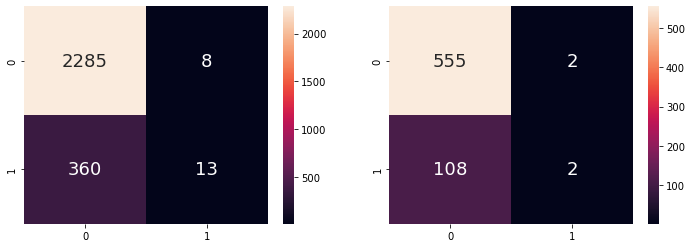

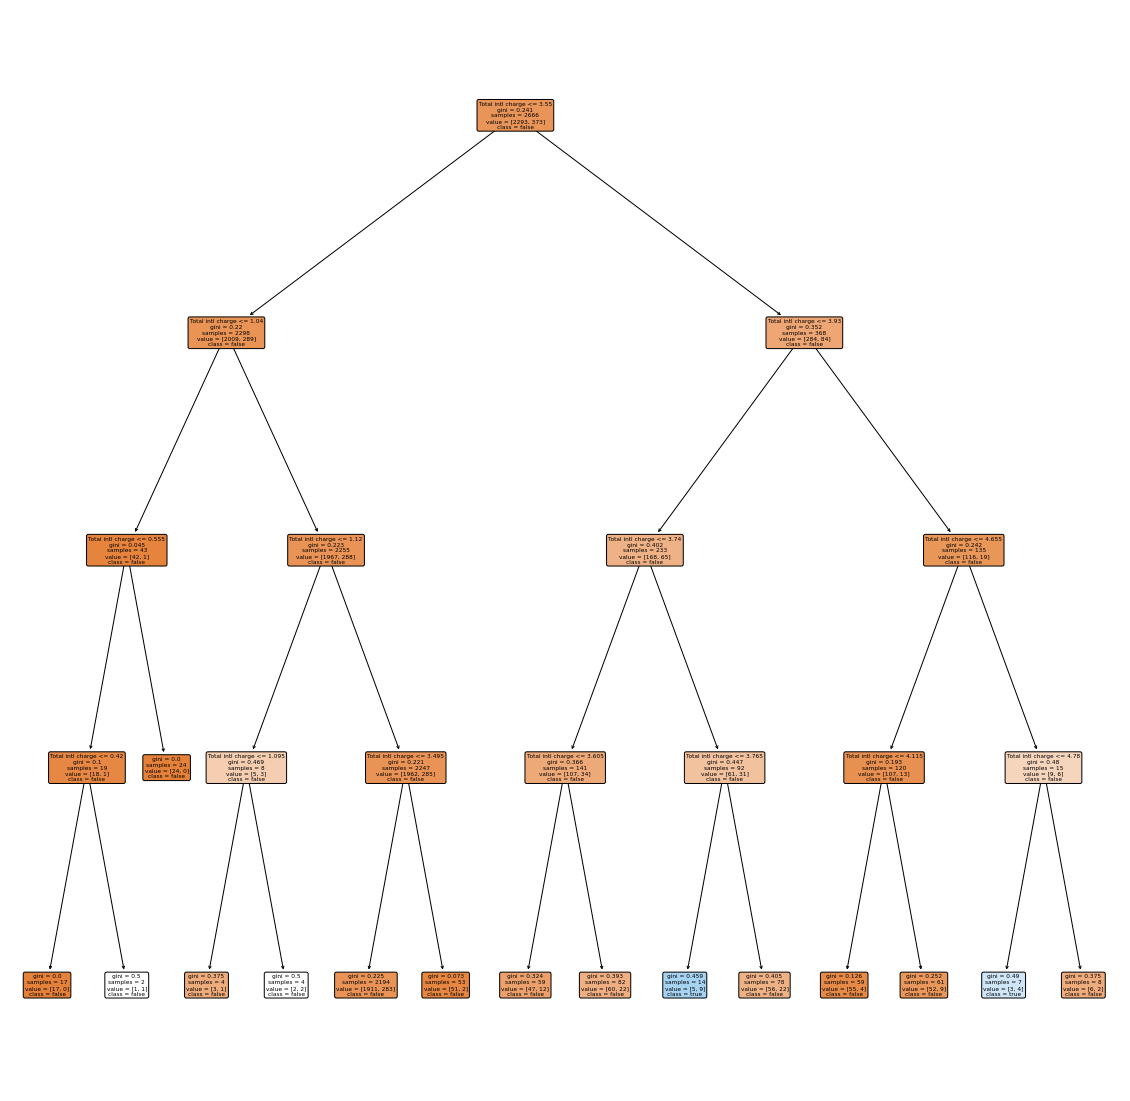

In [78]:
from sklearn.tree import plot_tree

dectree3 = DecisionTreeClassifier(max_depth = 4)  
dectree3.fit(ch_train, churn_train3)                    


churn_train_pred3 = dectree3.predict(ch_train)
churn_test_pred3 = dectree3.predict(ch_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(ch_train, churn_train3))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(ch_test, churn_test3))
print()

f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(churn_train3, churn_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(churn_test3, churn_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


f = plt.figure(figsize=(20,20))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=ch_train.columns, 
          class_names=["false","true"])